**Exploratory Analysis of the Titanic Dataset**

**Project Overview**
> In this Project, I would like to investigate the Titanic Dataset using python libraries Scipy, Numpy, Pandas, Matplotlib and Seaborn.

# Introduction
> The Dataset contains demographics and passenger information from 891 of th 2224 passeners who boarded the Titanic ship.

# Loading and Preview of Data

In [155]:
# first import the necessary python libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [156]:
# Now load the dataset into pandas dataframe and
# view the first few rows
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
# view the data information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> From the above summary, we have 891 entries. It is clear that there are some missing entries in Age, cabin and Embarked. Am going to fix the age column since I will have a number of questions from the same column.

# Fixing the missing ages

> In order to review data by distribution and respond to various questions, I would like to deal with the issue of the misssing ages.

> In this case I will replace the missing values with the mean.

> To have the best representative of values, I will take the mean based on sex and the Pclass. When replacing the missing ages, the two factors will be kept in consideration.

In [158]:
# find mean ages, taking into consideration sex and Pclass.
mean_of_ages = titanic_data.groupby(['Sex', 'Pclass'])['Age'].mean()
display(mean_of_ages)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [159]:
# replace the null age
def replace_missing_age(entry):
    if pd.isnull(entry['Age']):
        return mean_of_ages[entry['Sex'], entry['Pclass']]
    else:
        return entry['Age']

titanic_data['Age'] = titanic_data.apply(replace_missing_age, axis=1)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Judging from the above the data, the missing ages have been filled

# Exploring, Asking Questions, Gaining Insights

> I am going to do some Exploratory Data Analysis, and as I go along, I will discover some familiarity with statiscal identities and formulars to get to the root of what was happening on the Titanic.
 
 > I will be exploring the the Titanic dataset and respond to some questions. The following are some of the questions about the data:
 - Which gender had better chance of survival
 - What was the women and children chance of survival (children age<18)
 
 - Which social class had better chance of survival
 - Which age group had the better chance of survival
 - What was the male and female survival per class and by mean_of_ages
 - Did age affect the chances of survival
 -Who was the oldest passenger aboard the ship? (Hint, .max(column))
- How much did the cheapest ticket cost? (Hint, .min(column))
- What was the range of ticket

In [160]:
# Describe the titanic_data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> The mean age is roughly 30 years, while the mean fare is $32.20.  In the descriptive analysis above, there is large variance in fare because the max fare was $512.33, but the max age was only 80.

Text(0.5, 0, 'Age (in Years)')

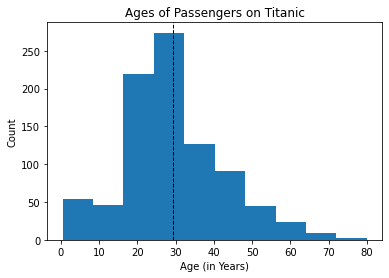

In [161]:
# plot the mean age in the histogram

plt.hist(titanic_data.Age)
plt.axvline(titanic_data.Age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')

Text(0.5, 0, 'Age (in Years)')

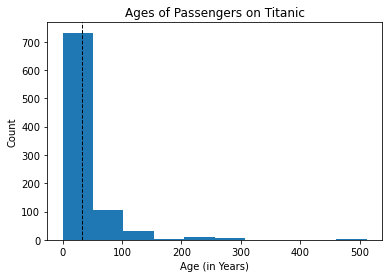

In [162]:
# plot the mean Fare in the histogram

plt.hist(titanic_data.Fare)
plt.axvline(titanic_data.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')

> Judging from the two charts above, we get an insight on how fares had a much larger variance than ages did on the Titanic.

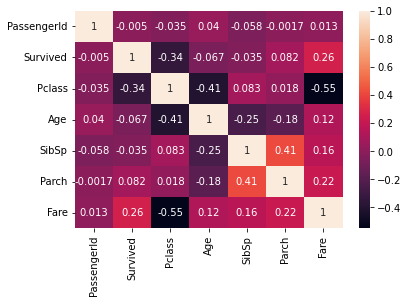

In [163]:
# find the data correlation
sns.heatmap(titanic_data.corr(), annot=True)
plt.show()

## Question 1: 
**Which gender had a better chance of survival**


In [164]:
# calculate the total number that survived by sex

# group sex
group_by_gender = titanic_data.groupby('Sex')

#calculate the survived by sex
survived_by_gender = group_by_gender['Survived'].sum()
survived_by_gender.name = 'Survived'
display(survived_by_gender)

#find the total by sex
total_by_gender = group_by_gender['Survived'].size()
total_by_gender.name = 'Total'
display(total_by_gender)

# concat the separate results into one data frame
survived_total_by_gender = pd.concat([survived_by_gender, total_by_gender], axis=1)
survived_total_by_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

,Survived,Total
Sex,,
female,233,314
male,109,577


In [165]:
# find the percentage that survived
survived_percentage = (survived_total_by_gender['Survived']/survived_total_by_gender['Total'])*100
survived_total_by_gender['Percentage'] = survived_percentage
survived_total_by_gender

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


**Now we can vizualize our finding**

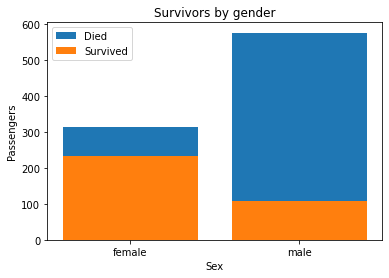

In [166]:
n = range(len(survived_total_by_gender.index.values))
ht = survived_total_by_gender.Total
hs = survived_total_by_gender.Survived

pht = plt.bar(n, ht)
phs = plt.bar(n, hs)

plt.xticks(n, survived_total_by_gender.index.values )
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by gender')

plt.legend([pht, phs], ['Died', 'Survived'])

**conclusion**
> In the above visualization and the percentage of survival, it is clear that female survival rate was at 74.2%, and that of male was at 18.9%. This mean women survival rate was 4 times compared to that of men.

> The possible conclusion would be that females were given priority in the rescue operation while some men might have sacrificed themselves to let the female survive.

## Question 2:
**What was women and children chance of survival vs adult men (children age<18)**

In [167]:
women_and_children = titanic_data.loc[(titanic_data['Sex'] == "female") | (titanic_data['Age'] < 18)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    68.817204
0    31.182796
Name: Survived, dtype: float64

In [168]:
adult_men = titanic_data[(titanic_data['Sex'].str.match('male')) & (titanic_data['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    83.460076
1    16.539924
Name: Survived, dtype: float64

**conlusion**
> From these two we can see that adult men had an 16.80% chance of survival, while women and children had a 53.98% chance of survival. We can conclude that women and children had a better chance of survival compared to grown men.

## Question 3:
**What was the probability of survival for children, men and women?**

In [169]:
# probability of survival for a child
children = titanic_data[titanic_data['Age']<18]
surviving_children = titanic_data[(titanic_data['Age']<18) & (titanic_data['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0]/children.shape[0]
format(child_chance_of_survival, ".0%")

'54%'

In [170]:
# probability of survival for a woman
women = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 18)]
surviving_women = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 18) & (titanic_data['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0]/women.shape[0]
format(women_chance_of_survival, ".0%")

'76%'

In [171]:
# probability of grown men survival
men = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Age'] > 18)]
surviving_men = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Age'] > 18) & (titanic_data['Survived'] == 1)]
men_chance_of_survival = surviving_men.shape[0]/men.shape[0]
format(men_chance_of_survival, ".0%")

'17%'

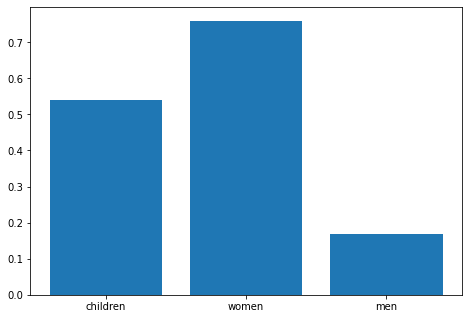

In [172]:
# Now let's graph them:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["children", "women", "men"]
data = [child_chance_of_survival, women_chance_of_survival, men_chance_of_survival]
ax.bar(x_axis, data)
plt.show()

**conclusion**
> We can conclude that grown women had the best chance of surviving, and children also had a strong chance. Men, however, did not. 